In [44]:
import pandas as pd
import numpy as np
import numpy.random as npr

In [45]:
data = pd.read_csv('SCI.TXT', header=None,
        usecols=[0,1,2,4,5,7,8,15,16,17,18])
columns_names = {0:'authors', 1:'title', 2:'source', 4:'language',
           5:'doctype', 7:'related_records_count',
           8:'references_count', 15:'rc', 16:'author_keywords',
           17:'editor_keywords', 18:'abstract'}
data = data.rename_axis(columns_names, axis=1)#.iloc[npr.choice(len(data), int(1e3))]

In [46]:
data = data.query('language != "English"')

In [47]:
data.index = np.arange(len(data))
data

,authors,title,source,language,doctype,related_records_count,references_count,rc,author_keywords,editor_keywords,abstract
0,Korpela-A,The Effects of Fatty-Acid Soaps on the Propert...,"PAPIER 1999, Vol 53, Iss 10, pp 604-610",German,Article,3,24,"FINNISH-PULP-&-PAPER-RES-INST, TEKNIIKANTIE 2,...",NaN,FLOTATION DEINKING,Some of the fatty acid soaps used in the deink...
1,Bibikova-EV Slabunov-AI Bogdanova-SV Skiold-T,Early Precambrian Tectonothermal Evolution of ...,"GEOKHIMIYA 1999, Iss 8, pp 842-857",Russian,Article,20,41,"VI-VERNADSKII-INST-GEOCHEM-&-ANALYT-CHEM, UL K...",NaN,KOLA-PENINSULA; MOBILE BELT; TITANITE; GEOCHRO...,NaN
2,Malmstrom-E,A New-World Opens Up in the Factory,"SVENSK PAPPERSTIDNING-NORDISK CELLULOSA 1999, ...",Swedish,Article,0,0,"TEKN-HGSK, TAMPERE, FINLAND",NaN,NaN,NaN
3,Sjoberg-T Laine-A,Post-Filtering at Assidoman in Karlsborg - Pro...,"SVENSK PAPPERSTIDNING-NORDISK CELLULOSA 1999, ...",Swedish,Article,0,0,"AHLSTROM-MACHINERY-CORP, FIBERLINE, HELSINKI, ...",NaN,NaN,NaN
4,Favre-C,Periodic Points for Birational Mappings of P-2,"ANNALES DE L INSTITUT FOURIER 1998, Vol 48, Is...",French,Article,3,11,"ROYAL-INST-TECHNOL, DEPT MATH, S-10044 STOCKHO...",NaN,NaN,We give a sufficient condition for the existen...
5,Mallion-JM Benkritly-A Hansson-L Zanchetti-A,Effect of Intensive Antihypertensive Treatment...,ARCHIVES DES MALADIES DU COEUR ET DES VAISSEAU...,French,Article,12,9,"CHU-GRENOBLE, SERV MED INTERNE & CARDIOL, F-38...",NaN,BLOOD-PRESSURE; DISEASE; TRIALS,The aim of the HOT Study (Hypertension Optimal...
6,Wiklund-I Halling-K Rydenbergsten-T,What Is the Effect of Lowering the Blood-Press...,ARCHIVES DES MALADIES DU COEUR ET DES VAISSEAU...,French,Article,16,9,"ASTRA-HASSLE-AB, DEPT RECH QUAL VIE, S-3183 MO...",NaN,OF-LIFE; SYMPTOMS,Nine hundred and twenty-two hypertensive patie...
7,Mai-D Borch-K Greisen-G,The Scandinavian Experience,"ARCHIVES DE PEDIATRIE 1999, Vol 6, Iss S2, pp ...",French,Article,3,3,"RIGSHOSP, UNITE NEONATOL, DK-2100 COPENHAGEN, ...",NaN,NaN,NaN
8,Ahnfeltronne-I Haahr-PM,New Growth-Hormone Secretagogues - From Physio...,"ARCHIVES DE PEDIATRIE 1998, Vol 5, Iss S4, pp ...",French,Article,20,35,"HLTH-CARE-DISCOVERY, NOVO NORDISK PARC, G8-2-2...",Growth Hormone Releasing Peptides; Growth Horm...,GH-RELEASING HORMONE; FACTOR-I AXIS; HEXAPEPTI...,Growth hormone releasing peptides (GHRP) are s...
9,Descamps-D Lhuillier-A Lynga-C Wahlstrom-CG Gi...,Application of Harmonics Generated in a Gas-Je...,"JOURNAL DE PHYSIQUE IV 1999, Vol 9, Iss P5, pp...",French,Article,0,5,"LUND-INST-TECHNOL, DEPT PHYS, POB 118, S-22100...",NaN,NaN,NaN


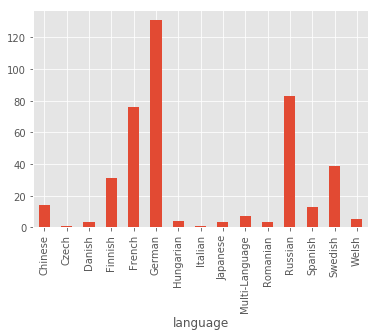

In [64]:
import matplotlib.pyplot as plt
lang = data.groupby('language').size().plot(kind='bar')
plt.style.use('ggplot')
plt.show()

In [5]:
data = data.fillna('')
data = data.join(pd.DataFrame(
    data['author_keywords'].apply(lambda x: x.lower().replace('-', ' ').
    replace('; ',' ').replace('(',' ').replace(')', ' ').split(sep=' ')) + 
    data['editor_keywords'].apply(lambda x: x.lower().replace('-', ' ').
    replace('; ',' ').replace('(',' ').replace(')', ' ').split(sep=' '))). 
    rename_axis({0:'keywords'}, axis=1))
keyword = list()
for klist in data['keywords']:
    seen = set()
    newklist = list()
    for k in klist:
        if k not in seen and len(k) > 2 and k.isalpha():
            newklist.append(k)
            seen.add(k)
    keyword.append(newklist)
data['keywords'] = pd.Series(keyword)
data['authors'] = data['authors'].apply(lambda x: x.lower().split())
data['language'] = data['language'].apply(lambda x: x.lower())
data['doctype'] = data['doctype'].apply(lambda x: x.lower())
data['title'] = data['title'].apply(lambda x: x.lower())
data['abstract'] = data['abstract'].apply(lambda x: x.lower())
data['source'] = data['source'].apply(lambda x: x.lower().split(sep=','))
journal = list()
year = list()
for sentence in data['source']:    
    journal.append(sentence[0][:-5])
    year.append(sentence[0][-4:])
data = data.join(pd.DataFrame(journal, columns=['journal']))
data = data.join(pd.DataFrame(year, columns=['article_year']))
data['rc'] = data['rc'].apply(lambda x: x.lower().split(sep='/'))
univ = list()
for list_sentences in data['rc']:
    u = list()
    for sentence in list_sentences:
        words = sentence.split(', ')
        u.append((words[0], words[-1]))
    univ.append(np.array(u))
data = data.join(pd.DataFrame(pd.Series(univ),columns=['university_country']))
data = data.drop(['author_keywords',
    'editor_keywords', 'rc', 'source'], axis=1)

In [6]:
data.shape

(414, 11)

In [43]:
data

,authors,title,language_id,doctype_id,related_records_count,references_count,abstract,keywords,journal_id,article_year,university_country
0,[korpela-a],the effects of fatty-acid soaps on the propert...,5,0,3,24,some of the fatty acid soaps used in the deink...,"[flotation, deinking]",93,1999,"[[finnish-pulp-&-paper-res-inst, finland]]"
1,"[bibikova-ev, slabunov-ai, bogdanova-sv, skiol...",early precambrian tectonothermal evolution of ...,11,0,20,41,,"[kola, peninsula, mobile, belt, titanite, geoc...",52,1999,"[[vi-vernadskii-inst-geochem-&-analyt-chem, ru..."
2,[malmstrom-e],a new-world opens up in the factory,13,0,0,0,,[],109,1999,"[[tekn-hgsk, finland]]"
3,"[sjoberg-t, laine-a]",post-filtering at assidoman in karlsborg - pro...,13,0,0,0,,[],109,1999,"[[ahlstrom-machinery-corp, finland]]"
4,[favre-c],periodic points for birational mappings of p-2,4,0,3,11,we give a sufficient condition for the existen...,[],7,1998,"[[royal-inst-technol, sweden]]"
5,"[mallion-jm, benkritly-a, hansson-l, zanchetti-a]",effect of intensive antihypertensive treatment...,4,0,12,9,the aim of the hot study (hypertension optimal...,"[blood, pressure, disease, trials]",14,1999,"[[chu-grenoble, france], [labs-astra-france, f..."
6,"[wiklund-i, halling-k, rydenbergsten-t]",what is the effect of lowering the blood-press...,4,0,16,9,nine hundred and twenty-two hypertensive patie...,"[life, symptoms]",14,1999,"[[astra-hassle-ab, sweden], [univ-bergen, norw..."
7,"[mai-d, borch-k, greisen-g]",the scandinavian experience,4,0,3,3,,[],13,1999,"[[rigshosp, denmark]]"
8,"[ahnfeltronne-i, haahr-pm]",new growth-hormone secretagogues - from physio...,4,0,20,35,growth hormone releasing peptides (ghrp) are s...,"[growth, hormone, releasing, peptides, secreta...",13,1998,"[[hlth-care-discovery, denmark]]"
9,"[descamps-d, lhuillier-a, lynga-c, wahlstrom-c...",application of harmonics generated in a gas-je...,4,0,0,5,,[],59,1999,"[[lund-inst-technol, sweden], [lure, france]]"


In [7]:
language_series = pd.Series(sorted(set(data['language'])))
language = (pd.DataFrame(language_series.index).
    rename(columns={0:'language_id'}).join(pd.DataFrame(language_series).
    rename(columns={0:'language_name'})))
language.to_csv('language.csv', sep=';', index=False)

In [8]:
language

,language_id,language_name
0,0,chinese
1,1,czech
2,2,danish
3,3,finnish
4,4,french
5,5,german
6,6,hungarian
7,7,italian
8,8,japanese
9,9,multi-language


In [9]:
language.shape

(15, 2)

In [12]:
doctype_series = pd.Series(sorted(set(data['doctype'])))
doctype = (pd.DataFrame(doctype_series.index).rename(columns={0:'doctype_id'}).
    join(pd.DataFrame(doctype_series).rename(columns={0:'doctype_name'})))
doctype.to_csv('doctype.csv', sep=';', index=False)

In [13]:
doctype

,doctype_id,doctype_name
0,0,article
1,1,editorial-material
2,2,letter
3,3,meeting-abstract
4,4,reprint
5,5,review


In [14]:
doctype.shape

(6, 2)

In [15]:
journal_series = pd.Series(sorted(set(data['journal'])))
journal = (pd.DataFrame(journal_series.index).rename(columns={0:'journal_id'}).
    join(pd.DataFrame(journal_series).rename(columns={0:'journal_name'})))
journal.to_csv('journal.csv', sep=';', index=False)

In [16]:
journal[150:160]

,journal_id,journal_name


In [17]:
journal.shape

(131, 2)

In [18]:
author = list() 
for sentence in data['authors']:
    author.extend(sentence)
author_series = pd.Series(sorted(set([s.lower() for s in author])))
author = (pd.DataFrame(author_series.index).rename(columns={0:'author_id'}).
    join(pd.DataFrame(author_series).rename(columns={0:'author_name'})))
author.to_csv('author.csv', sep=';', index=False)

In [19]:
author[10000:10010]

,author_id,author_name


In [20]:
author.shape

(1649, 2)

In [21]:
author_dict = {v:k for k,v in author_series.iteritems()}
author_article_link = list()
for n, authors_of_article in enumerate(data['authors']):
    for aut in authors_of_article:
        author_article_link.append((author_dict[aut], n))
author_article_link = (pd.DataFrame(sorted(author_article_link)).
    rename(columns={0:'author_id', 1:'article_id'}))
author_article_link = author_article_link.drop_duplicates()
author_article_link.to_csv('map_article_author.csv', index=False, sep=';')

In [22]:
author_article_link[:10]

,author_id,article_id
0,0,281
1,1,15
2,2,120
3,3,226
4,4,99
5,5,298
6,6,302
7,7,99
8,8,18
9,8,46


In [23]:
author_article_link.shape

(1857, 2)

In [24]:
author_pairs = pd.merge(author_article_link, author_article_link, on='article_id').query('author_id_x != author_id_y')
author_pairs.shape

(28558, 3)

In [25]:
keyword = list() 
for sentence in data['keywords']:
    keyword.extend(sentence)
keyword_series = pd.Series(sorted(set(keyword)))
keyword = (pd.DataFrame(keyword_series.index).rename(columns={0:'keyword_id'}).
    join(pd.DataFrame(keyword_series).rename(columns={0:'keyword_name'})))
keyword.to_csv('keyword.csv', sep=';', index=False)

In [26]:
keyword

,keyword_id,keyword_name
0,0,abdominal
1,1,abies
2,2,ablation
3,3,absorption
4,4,academy
5,5,acceptance
6,6,acceptor
7,7,access
8,8,accuracy
9,9,acetaminophen


In [27]:
keyword.shape

(1982, 2)

In [28]:
keyword_dict = {v:k for k,v in keyword_series.iteritems()}
keyword_article_link = list()
for n, keywords_of_article in enumerate(data['keywords']):
    for kw in keywords_of_article:
        keyword_article_link.append((keyword_dict[kw], n))
keyword_article_link = (pd.DataFrame(sorted(keyword_article_link)).
    rename(columns={0:'keyword_id', 1:'article_id'}))
keyword_article_link = keyword_article_link.drop_duplicates()
keyword_article_link.to_csv('map_article_keyword.csv', index=False, sep=';')

In [29]:
keyword_article_link[:10]

,keyword_id,article_id
0,0,203
1,1,108
2,2,230
3,3,117
4,3,201
5,3,270
6,4,335
7,5,334
8,6,270
9,7,302


In [30]:
keyword_article_link.shape

(3086, 2)

In [31]:
university, country = list(), list()
for pairs in data['university_country']:
    country.extend((pairs)[:,1])
    university.extend((pairs)[:,0])
university_series = pd.Series(sorted(set(university)))
university = (pd.DataFrame(university_series.index).
    rename(columns={0:'university_id'}).join(pd.DataFrame(university_series).
    rename(columns={0:'university_name'})))
university.to_csv('university.csv', header=True, sep='\t', index=False)
country_series = pd.Series(sorted(set(country)))
country = (pd.DataFrame(country_series.index).rename(columns={0:'country_id'}).
    join(pd.DataFrame(country_series).rename(columns={0:'country_name'})))
country.to_csv('country.csv', sep=';', index=False)

In [32]:
university[10000:10010]

,university_id,university_name


In [33]:
university.shape

(669, 2)

In [34]:
country[:10]

,country_id,country_name
0,0,argentina
1,1,armenia
2,2,australia
3,3,austria
4,4,belgium
5,5,brazil
6,6,byelarus
7,7,canada
8,8,chile
9,9,costa-rica


In [35]:
country.shape

(48, 2)

In [36]:
university_dict = {v:k for k,v in university_series.iteritems()}
country_dict = {v:k for k,v in country_series.iteritems()}
a_u_c_link = list()
for n, uc_pairs in enumerate(data['university_country']):
    for u, c in uc_pairs:
        a_u_c_link.append(np.array([n, university_dict[u], country_dict[c]]))
a_u_c_link = (pd.DataFrame(a_u_c_link).
    rename(columns={0:'article_id', 1:'university_id', 2:'country_id'}))
a_u_c_link = a_u_c_link.drop_duplicates()
a_u_c_link.to_csv('map_article_university_country.csv', index=False, sep=';')

In [37]:
a_u_c_link.shape

(1101, 3)

In [38]:
a_u_c_link[:10]

,article_id,university_id,country_id
0,0,146,15
1,1,654,36
2,1,411,36
3,1,314,42
4,1,471,42
5,2,485,15
6,3,17,15
7,4,403,42
8,5,76,16
9,5,296,16


In [39]:
language_dict = {v:k for k,v in language_series.iteritems()}
data['language'] = data['language'].apply(lambda x: language_dict[x])
journal_dict = {v:k for k,v in journal_series.iteritems()}
data['journal'] = data['journal'].apply(lambda x: journal_dict[x])
doctype_dict = {v:k for k,v in doctype_series.iteritems()}
data['doctype'] = data['doctype'].apply(lambda x: doctype_dict[x])
data = data.rename(columns={'language':'language_id',
                    'journal':'journal_id', 'doctype':'doctype_id'})
article = (pd.DataFrame(data.index).rename(columns={0:'article_id'}).
    join(data.drop(['authors', 'keywords',
    'university_country', 'keywords'], axis=1)))
article.to_csv('article.csv', sep=';', index=False)

In [40]:
article[:10]

,article_id,title,language_id,doctype_id,related_records_count,references_count,abstract,journal_id,article_year
0,0,the effects of fatty-acid soaps on the propert...,5,0,3,24,some of the fatty acid soaps used in the deink...,93,1999
1,1,early precambrian tectonothermal evolution of ...,11,0,20,41,,52,1999
2,2,a new-world opens up in the factory,13,0,0,0,,109,1999
3,3,post-filtering at assidoman in karlsborg - pro...,13,0,0,0,,109,1999
4,4,periodic points for birational mappings of p-2,4,0,3,11,we give a sufficient condition for the existen...,7,1998
5,5,effect of intensive antihypertensive treatment...,4,0,12,9,the aim of the hot study (hypertension optimal...,14,1999
6,6,what is the effect of lowering the blood-press...,4,0,16,9,nine hundred and twenty-two hypertensive patie...,14,1999
7,7,the scandinavian experience,4,0,3,3,,13,1999
8,8,new growth-hormone secretagogues - from physio...,4,0,20,35,growth hormone releasing peptides (ghrp) are s...,13,1998
9,9,application of harmonics generated in a gas-je...,4,0,0,5,,59,1999


In [41]:
article.shape

(414, 9)